In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import pickle
import seaborn as sns
from pylab import rcParams
from keras.models import Model, load_model,Sequential
from keras.layers import Input,Dense
from keras.callbacks import ModelCheckpoint,TensorBoard
from keras import regularizers 
from keras.optimizers import adam

import missingno
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from imblearn.over_sampling import SMOTE,RandomOverSampler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from lightgbm import LGBMClassifier

%matplotlib inline

C:\Users\Gilbe\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Gilbe\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Gilbe\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Gilbe\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
data = pd.read_csv("D:/Fordham/bigdata/creditcard.csv")
data.head()

,Time,Period,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,0.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,1.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
from sklearn.preprocessing import StandardScaler
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data= data.drop(['Time','Amount'],axis=1)
data.head()

,Period,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,0.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,1.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


Text(0, 0.5, 'Frequency')

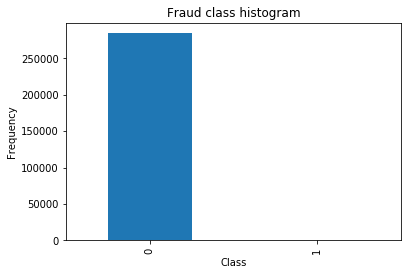

In [4]:
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [5]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0.5, 0, 'X')

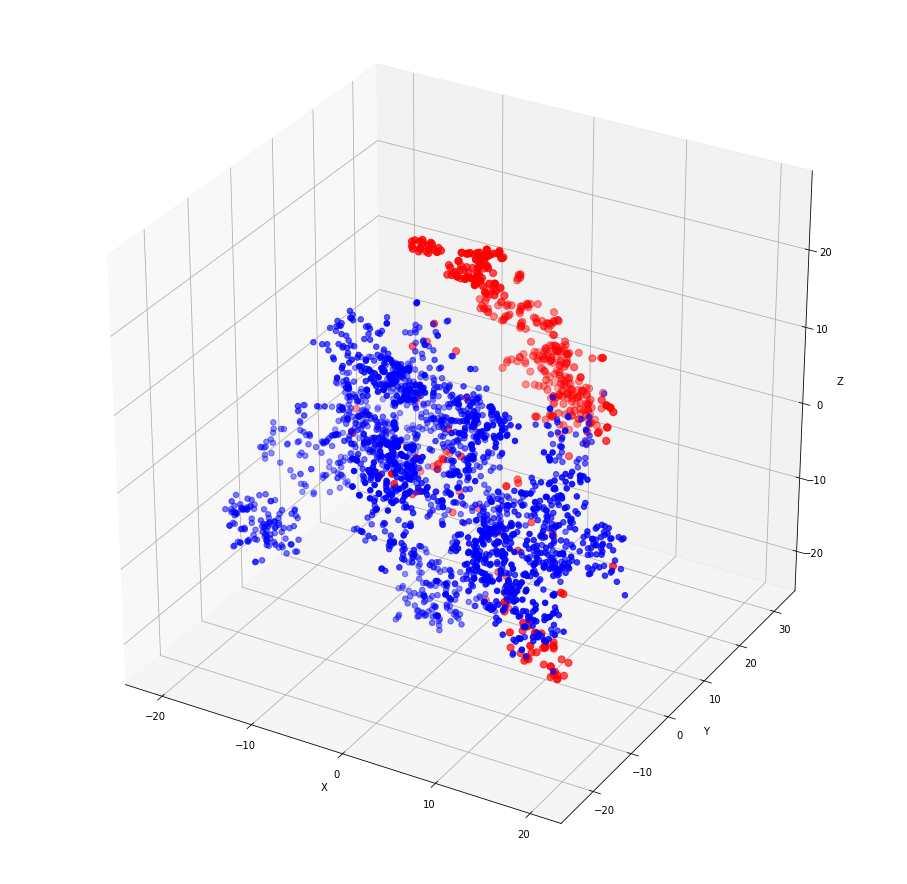

In [6]:
non_fraud = data[data['Class'] == 0].sample(2000)
fraud = data[data['Class'] == 1]

df = non_fraud.append(fraud).sample(frac=1).reset_index(drop=True)
X = df.drop(['Class'], axis = 1).values

index1 = df[df.Class==1].index
index0 = df[df.Class==0].index

from mpl_toolkits.mplot3d import Axes3D

data_tsne = TSNE(n_components=3).fit_transform(X)
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(data_tsne[index1,0],data_tsne[index1,1],data_tsne[index1,2],c='r',s=50)
ax.scatter(data_tsne[index0,0],data_tsne[index0,1],data_tsne[index0,2],c='b',s=30)

ax.set_zlabel('Z')  
ax.set_ylabel('Y')
ax.set_xlabel('X')


In [7]:
import tensorflow as tf
from tensorflow.keras import layers,Input,regularizers,Model,Sequential

x_norm = data[data['Class'] == 0].drop('Class',axis=1)
x_fraud = data[data['Class'] == 1].drop('Class',axis=1)

input_layer = Input(shape=(x_norm.shape[1],))

encoding_dim =14
encoded = layers.Dense(encoding_dim,activation='tanh',activity_regularizer=regularizers.l1(1e-4))(input_layer)
encoded = layers.Dense(encoding_dim/2, activation='relu')(encoded)

decoded = layers.Dense(encoding_dim/2, activation='tanh')(encoded)
decoded = layers.Dense(encoding_dim, activation='tanh')(decoded)

output_layer = layers.Dense(x_norm.shape[1],activation='relu')(decoded)

autoencoder = Model(input_layer,output_layer)
autoencoder.compile(optimizer='adam', loss="mse",metrics=['accuracy'])

tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True,
                          write_images=True) 
history=autoencoder.fit(x_norm, x_norm, 
                batch_size =32, epochs = 10, 
                shuffle = True, validation_split = 0.20)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 227452 samples, validate on 56863 samples
Epoch 1/10
227452/227452 [==============================] - 19s 83us/sample - loss: 0.7928 - acc: 0.5843 - val_loss: 0.7428 - val_acc: 0.7137
Epoch 2/10
227452/227452 [==============================] - 19s 83us/sample - loss: 0.7228 - acc: 0.6618 - val_loss: 0.7160 - val_acc: 0.7409
Epoch 3/10
227452/227452 [==============================] - 18s 79us/sample - loss: 0.7068 - acc: 0.6796 - val_loss: 0.7072 - val_acc: 0.7450
Epoch 4/10
227452/227452 [==============================] - 19s 82us/sample - loss: 0.7007 - acc: 0.6875 - val_loss: 0.7043 - val_acc: 0.7514
Epoch 5/10
227452/227452 [==============================] - 18s 79us/sample - loss: 0.6974 - acc: 0.6879 - val_loss: 0.7022 - val_acc: 0.7477
Epoch 6/10
227452/227452 [==============================] - 18s 79us/sample - loss: 0.6944 - acc: 0.6876 - val_loss: 0.70

In [8]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
dense (Dense)                (None, 14)                434       
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 105       
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_3 (Dense)              (None, 14)                112       
_________________________________________________________________
dense_4 (Dense)              (None, 30)                450       
Total params: 1,157
Trainable params: 1,157
Non-trainable params: 0
___________________________________________________________

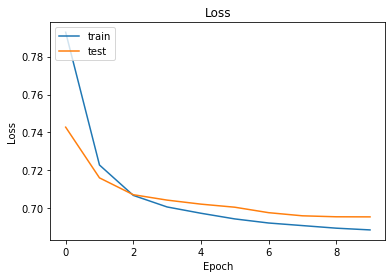

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left');

In [17]:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])

norm_hid_rep = hidden_representation.predict(x_norm)
fraud_hid_rep = hidden_representation.predict(x_fraud)
rep_x = np.append(norm_hid_rep, fraud_hid_rep, axis = 0)
y_n = np.zeros(norm_hid_rep.shape[0])
y_f = np.ones(fraud_hid_rep.shape[0])
rep_y = np.append(y_n, y_f)
rep_x.shape

(284807, 7)

In [ ]:
data_tsne = TSNE(n_components=3).fit_transform(rep_x)

In [43]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [44]:
credit_cards=pd.read_csv("creditcard.csv")
credit_cards.head()
columns=credit_cards.columns

features_columns=columns.delete(len(columns)-1)

features=credit_cards[features_columns]
labels=credit_cards['Class']

In [45]:
features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            labels, 
                                                                            test_size=0.2, 
                                                                            random_state=0)

In [46]:
oversampler=SMOTE(random_state=0)
os_features,os_labels=oversampler.fit_sample(features_train,labels_train)

In [47]:
len(os_labels[os_labels==1])

227454

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report 

In [49]:
param_grid = {'C': [0.01,0.1, 1, 10, 100, 1000,],
                            'penalty': [ 'l1', 'l2']}

grid_search = GridSearchCV(LogisticRegression(),  param_grid, cv=10) 
grid_search.fit(features_train, labels_train) 

/Users/mandili/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mandili/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mandili/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mandili/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mandili/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default so

/Users/mandili/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mandili/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mandili/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mandili/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mandili/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default so

/Users/mandili/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mandili/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mandili/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mandili/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mandili/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default so

/Users/mandili/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mandili/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mandili/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mandili/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mandili/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default so

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [50]:
best_model = grid_search.best_estimator_

In [51]:
grid_search.best_params_

{'C': 10, 'penalty': 'l1'}

In [52]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/Users/mandili/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Recall metric in the testing dataset:  0.6260162601626016


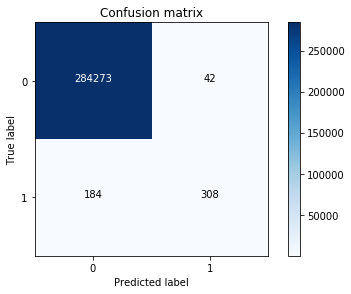

In [53]:
import itertools
lr = LogisticRegression(C = 10, penalty = 'l1')
lr.fit(features,labels.ravel())
labels_pred = lr.predict(features.values)

cnf_matrix = confusion_matrix(labels,labels_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

/Users/mandili/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Recall metric in the testing dataset:  0.900990099009901


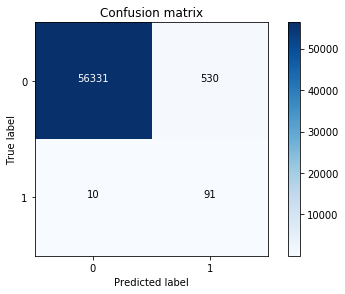

In [54]:
import itertools

lr = LogisticRegression(C = 10, penalty = 'l1')
lr.fit(os_features,os_labels.ravel())
y_pred = lr.predict(features_test.values)

cnf_matrix = confusion_matrix(labels_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

/Users/mandili/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Recall metric in the testing dataset:  0.8983739837398373


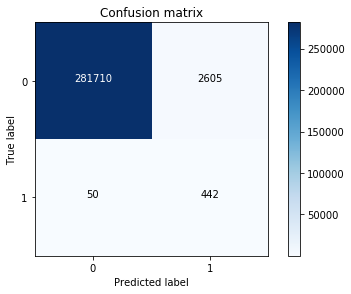

In [55]:
import itertools
lr = LogisticRegression(C = 10, penalty = 'l1')
lr.fit(os_features,os_labels.ravel())
y_pred = lr.predict(features.values)

cnf_matrix = confusion_matrix(labels,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [56]:
from sklearn.metrics import roc_auc_score,roc_curve,precision_score,auc,precision_recall_curve
from sklearn.metrics import accuracy_score,recall_score,f1_score,confusion_matrix,classification_report

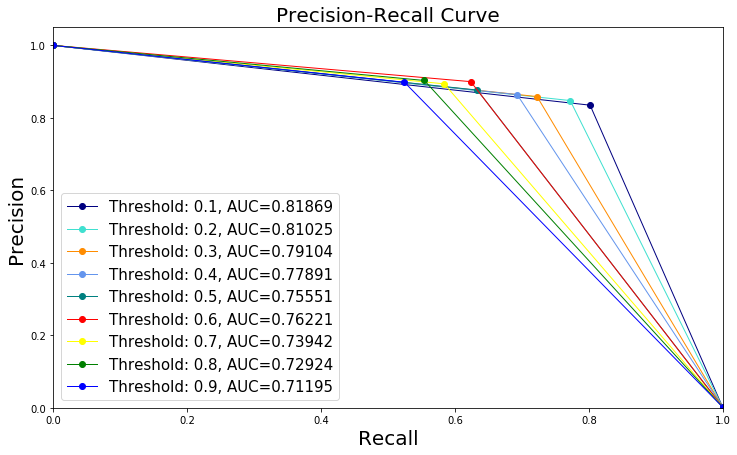

In [57]:
import matplotlib
from itertools import cycle
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

labels_pred_proba = best_model.predict_proba(features_test)  

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]  
plt.figure(figsize=(12,7))

j = 1
for i,color in zip(thresholds,colors):
    labels_test_predictions_prob = labels_pred_proba[:,1] > i 

    precision, recall, thresholds = precision_recall_curve(labels_test, labels_test_predictions_prob)
    area = auc(recall, precision)
    
    

    plt.plot(recall, precision, color=color,linewidth = '1',marker='o',
                 label='Threshold: %s, AUC=%0.5f' %(i , area)) 

    plt.xlabel('Recall',fontsize=20)
    plt.ylabel('Precision',fontsize=20)
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve',fontsize=20)
    plt.legend(loc="lower left",fontsize=15)

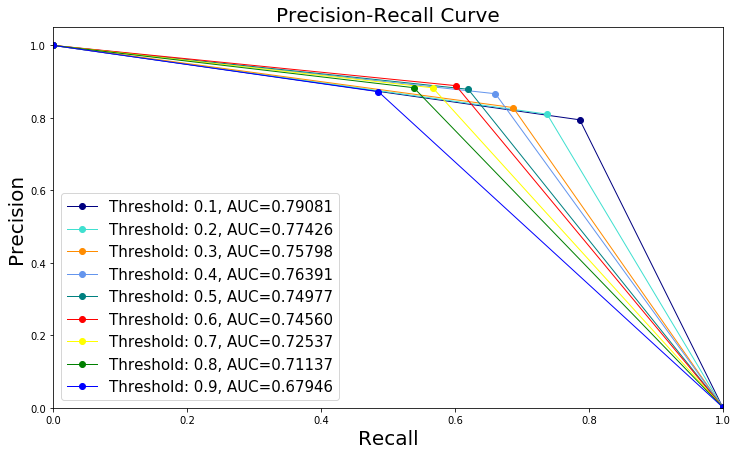

In [58]:
from itertools import cycle

colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

labels_pred_proba = best_model.predict_proba(features) 

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]  

plt.figure(figsize=(12,7))

j = 1
for i,color in zip(thresholds,colors):
    labels_predictions_prob = labels_pred_proba[:,1] > i 

    precision, recall, thresholds = precision_recall_curve(labels, labels_predictions_prob)
    area = auc(recall, precision)

    plt.plot(recall, precision,color=color,linewidth = '1',marker='o',
                 label='Threshold: %s, AUC=%0.5f' %(i , area)) 
    plt.xlabel('Recall',fontsize=20)
    plt.ylabel('Precision',fontsize=20)
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve',fontsize=20)
    plt.legend(loc="lower left",fontsize=15)